# 📌 <span style="color:green;">**Introduction to Regression & Logistic Regression**</span>

Regression is a fundamental technique in **machine learning** that helps us **understand relationships between variables** and make **predictions**.

---

## 🚀 <span style="color:blue;">**What is Regression?**</span>

Regression is used to **explain the relationship** between:
- **One dependent variable (continuous output)**.
- **One or more independent variables (features)**.

📌 **Example:** Predicting a student's test score based on the number of hours studied.

⚠ **Limitation of Regression for Classification**  
Since **regression predicts continuous values**, it **cannot be directly used** for classification problems where outputs must be **categories** (e.g., Pass/Fail, Yes/No, Dog/Cat).

---

# 📌 <span style="color:purple;">**Logistic Regression for Classification**</span>

Logistic regression is a **classification algorithm** that:
- Uses **regression** to calculate a numeric score.
- Transforms that score into a **probability** using the **sigmoid function**.
- Maps the probability to **class labels** (e.g., 0 or 1).

---

## ✅ <span style="color:blue;">**Standard Logistic Function (Sigmoid Function)**</span>

The **sigmoid function** maps any real number into a probability between **0 and 1**:

$$
\sigma(y) = \frac{1}{1 + e^{-y}}
$$

where:
- **$ \sigma(y) $** → Probability estimate (between 0 and 1).
- **$ y $** → Linear prediction (e.g., $ b_0 + b_1x $).
- **$ e $** → Euler’s number (~2.718).

<img src="https://drive.google.com/uc?id=1WU_Yn3RJaBvq3TxR19FLD7qabWA9fbsD" width=500/>

📌 **Why do we use sigmoid?**
- Converts continuous predictions into **probabilities**.
- Enables us to classify based on a **decision boundary**.

---

## ✅ <span style="color:blue;">**Binary Logistic Regression**</span>

Binary logistic regression predicts the **probability of an outcome** that has **only two possible values** (e.g., **Pass/Fail**, **Yes/No**, **Spam/Not Spam**).

📌 **How it Works**
1. Uses the **sigmoid function** to output probabilities.
2. Defines a **decision boundary** (default: **0.5**).
3. Assigns classes based on the threshold:
   - **$ p \geq 0.5 \Rightarrow \text{Class 1} $**
   - **$ p < 0.5 \Rightarrow \text{Class 0} $**

📌 **Visualization of Logistic Regression Curve:**
👉 **Insert logistic regression curve image here**

In logistic regression:
- **$ b_0 $** shifts the curve **left or right**.
- **$ b_1 $** controls the **steepness** of the curve.

---

# 📌 <span style="color:purple;">**Decision Boundary in Logistic Regression**</span>

<img src="https://drive.google.com/uc?id=1B-TH-xWYgM6JHv7QZS0yL8UtsDln1zxz"/>

Our **logistic function outputs probabilities** between **0 and 1**.  
To **convert probabilities to class labels**, we define a **decision boundary**:

$$
p \geq 0.5, \quad \text{Class = 1}
$$

$$
p < 0.5, \quad \text{Class = 0}
$$

Example:
- If **$ p = 0.8 $**, we classify **Class 1** (Pass).
- If **$ p = 0.3 $**, we classify **Class 0** (Fail).

📌 **Decision boundary can be adjusted** depending on the problem.

---

# 📌 <span style="color:purple;">**Loss Function: Cross-Entropy (Log Loss)**</span>

In **linear regression**, we use **Mean Squared Error (MSE)** as a loss function.  
However, for **classification**, we use **Cross-Entropy Loss (Log Loss):**

### **For Binary Classification ($ M = 2 $)**:

$$
-\left( y \log(p) + (1 - y) \log(1 - p) \right)
$$

### **For Multi-Class Classification ($ M > 2 $)**:

$$
- \sum_{c=1}^{M} y_{o,c} \log(p_{o,c})
$$

where:
- **$ M $** = Number of classes.
- **$ y $** = Actual class (1 for correct class, 0 otherwise).
- **$ p $** = Predicted probability for class **$ c $**.

📌 **Cross-Entropy loss penalizes incorrect predictions more heavily than small errors** in regression.

---

# 📌 <span style="color:purple;">**Example: Probability of Passing an Exam**</span>

### **Problem:**
A group of **20 students** studied between **0 and 6 hours** for an exam.  
We want to predict **the probability of passing based on study hours**.

📌 **Data Example:**

| Hours | Pass (0 = Fail, 1 = Pass) |
|-------|-----------------|
| 0.50  | 0 |
| 0.75  | 0 |
| 1.00  | 0 |
| 2.00  | 0 |
| 3.00  | 1 |
| 4.50  | 1 |
| 5.50  | 1 |

### ✅ **Step 1: Using Linear Regression**
We first fit a **linear regression model**:

$$
y = \beta_0 + \beta_1 \times \text{Hours}
$$

With:
- **$ \beta_0 = -0.2757 $**
- **$ \beta_1 = 0.2566 $**

For **Hours = [5, 0.75, 5.5]**, we get:

$$
y = [1.0073, -0.0833, 1.1357]
$$

### ✅ **Step 2: Convert to Probability Using Sigmoid**
Now, we apply the **sigmoid function**:

$$
p = \frac{1}{1 + e^{-y}}
$$

After transformation:

$$
p = [0.73, 0.48, 0.76]
$$

### ✅ **Step 3: Make Final Predictions**
Using a **threshold of 0.5**, we classify:

| Hours | Probability (p) | Predicted Label |
|-------|----------------|----------------|
| 5.00  | 0.73  | 1 (Pass) |
| 0.75  | 0.48  | 0 (Fail) |
| 5.50  | 0.76  | 1 (Pass) |

📌 **Interpretation:**
- A student studying **5 hours** has a **73% chance of passing**.
- A student studying **0.75 hours** has only **48% probability** and is **classified as Fail**.




In [1]:
    #importing libraries
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

    # Independent variable
    X = np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])

    # Dependent variable
    y = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

    # Reshape X to 2D array scikit-learn will accept 2D input only
    X = X.reshape(-1,1)

    #split dataset into train , test
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)

    #importing LogisticRegression
    from sklearn.linear_model import LogisticRegression

    #create logisticRegression object
    log_reg = LogisticRegression()

    #train model
    log_reg.fit(X_train,y_train)

    #test model
    y_pred = log_reg.predict(X_test)

    # finding accuracy of the constructed model
    from sklearn.metrics import accuracy_score
    accuarcy = accuracy_score(y_test, y_pred)
    print("Accuracy of the model is: ",accuarcy)

Accuracy of the model is:  0.6


# 📌 <span style="color:green;">**Softmax Regression: Multiclass Classification**</span>

Softmax Regression (also called **Multinomial Logistic Regression**) is an extension of **Logistic Regression** that can handle **multiple classes** directly **without** needing to train multiple binary classifiers.

---

## 🚀 <span style="color:blue;">**Why Softmax Regression?**</span>

In **binary classification**, **Logistic Regression** predicts the probability of one class (e.g., **Yes/No**, **Spam/Not Spam**). But what if we have **more than two classes**?

📌 **Example: Classifying Flowers**
- We want to classify **Iris flowers** into **three categories**:  
  🌸 **Setosa**, 🌼 **Versicolor**, 🌺 **Virginica**.

Instead of training multiple binary classifiers, **Softmax Regression** computes a **score** for each class and then applies the **Softmax function** to obtain **class probabilities**.

---

# 📌 <span style="color:purple;">**Mathematics Behind Softmax Regression**</span>

### ✅ **Step 1: Compute Scores for Each Class**
For a given input **$ x $**, we compute a score **$ s_k(x) $** for each class **$ k $**:

$$
s_k(x) = x^T \theta^{(k)}
$$

where:
- **$ x $** = Feature vector of the instance.
- **$ \theta^{(k)} $** = Parameter vector for class **$ k $**.
- Each class has its **own** **$ \theta^{(k)} $**, stored in a **parameter matrix** **$ \Theta $**.

---

### ✅ **Step 2: Apply Softmax Function**
After computing the **scores** for all classes, we **convert them into probabilities** using the **Softmax function**:

$$
P_k = \sigma(s(x))_k = \frac{\exp(s_k(x))}{\sum_{j=1}^{K} \exp(s_j(x))}
$$

where:
- **$ K $** = Number of classes.
- **$ s(x) $** = Vector containing scores for each class.
- **$ P_k $** = Probability that the instance belongs to class **$ k $**.

📌 **Why Softmax?**
- Converts raw scores into **probabilities** (between **0 and 1**).
- Ensures that **sum of probabilities = 1** (useful for classification).

---

### ✅ **Step 3: Make Predictions**
The Softmax classifier assigns the **class with the highest probability**:

$$
y = \arg\max_k \sigma(s(x))_k = \arg\max_k s_k(x) = \arg\max_k (\theta^{(k)})^T x
$$

📌 **Interpretation**:
- Compute **scores** for each class.
- Apply **Softmax** to get **probabilities**.
- Choose the **class with the highest probability**.

---

## 📌 <span style="color:purple;">**Training Softmax Regression**</span>

### **✅ Objective: Minimize Cross-Entropy Loss**
To train the model, we **minimize the cross-entropy loss function**:

$$
J(\Theta) = - \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log (P_k^{(i)})
$$

where:
- **$ y_k^{(i)} $** = Target probability (1 if instance **$ i $** belongs to class **$ k $**, otherwise 0).
- **$ P_k^{(i)} $** = Predicted probability for class **$ k $**.
- **$ m $** = Number of training samples.

📌 **Why Cross-Entropy?**
- **Penalizes incorrect predictions**.
- Encourages **higher probability for correct class**.
- Equivalent to **Log Loss** when **$ K = 2 $** (Binary Logistic Regression).

---

### **✅ Computing Gradients for Optimization**
To update the model, we compute the **gradient of the cost function**:

$$
\Delta \theta^{(k)} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} (P_k^{(i)} - y_k^{(i)}) x^{(i)}
$$

📌 **Gradient Descent Algorithm**
1. Compute **gradients** for each class.
2. Update **parameter matrix** **$ \Theta $**.
3. Repeat until **convergence**.

---

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<img src="https://drive.google.com/uc?id=1veVqNjGdyOx_YBao4HFt30wIAPZNYq_5"/>

<Figure size 720x432 with 0 Axes>

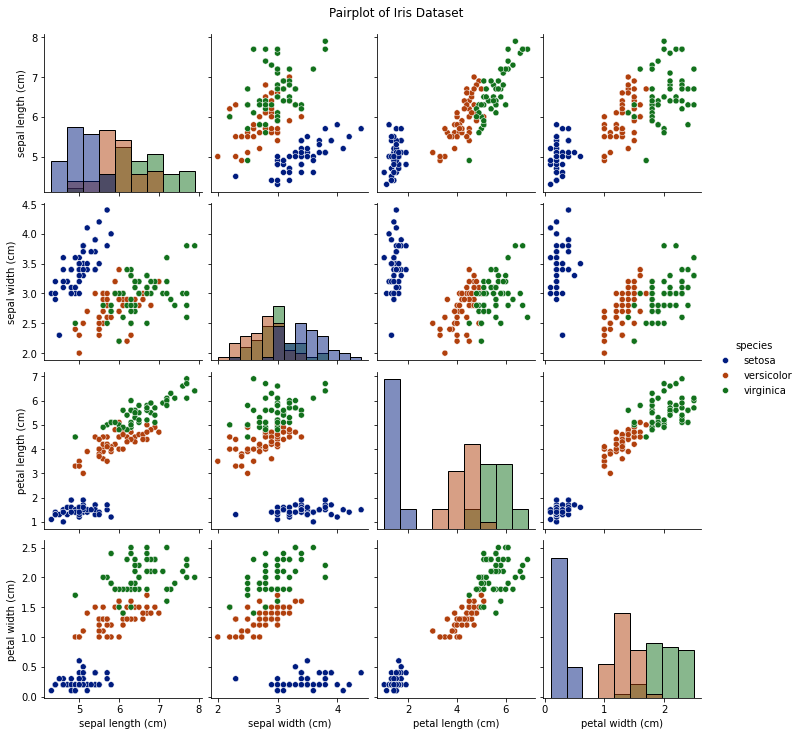

<Figure size 432x288 with 0 Axes>

In [3]:
plt.figure(figsize=(10, 6))
sns.pairplot(iris_df, hue="species", diag_kind="hist", palette="dark")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


plt.tight_layout()
plt.show()


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target  # Features & Target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
log_reg.fit(X_train, y_train)

# Make Predictions
y_pred = log_reg.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)


Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/home/rgukt-basar/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
